In [3]:
aa_heavy_atoms = {
    "ALA": ["N", "CA", "C", "O", "CB"],
    "ARG": ["N", "CA", "C", "O", "CB", "CG", "CD", "NE", "CZ", "NH1", "NH2"],
    "ASN": ["N", "CA", "C", "O", "CB", "CG", "OD1", "ND2"],
    "ASP": ["N", "CA", "C", "O", "CB", "CG", "OD1", "OD2"],
    "CYS": ["N", "CA", "C", "O", "CB", "SG"],
    "GLN": ["N", "CA", "C", "O", "CB", "CG", "CD", "OE1", "NE2"],
    "GLU": ["N", "CA", "C", "O", "CB", "CG", "CD", "OE1", "OE2"],
    "GLY": ["N", "CA", "C", "O"],
    "HIS": ["N", "CA", "C", "O", "CB", "CG", "ND1", "CD2", "CE1", "NE2"],
    "ILE": ["N", "CA", "C", "O", "CB", "CG1", "CG2", "CD1"],
    "LEU": ["N", "CA", "C", "O", "CB", "CG", "CD1", "CD2"],
    "LYS": ["N", "CA", "C", "O", "CB", "CG", "CD", "CE", "NZ"],
    "MET": ["N", "CA", "C", "O", "CB", "CG", "SD", "CE"],
    "PHE": ["N", "CA", "C", "O", "CB", "CG", "CD1", "CD2", "CE1", "CE2", "CZ"],
    "PRO": ["N", "CA", "C", "O", "CB", "CG", "CD"],
    "SER": ["N", "CA", "C", "O", "CB", "OG"],
    "THR": ["N", "CA", "C", "O", "CB", "OG1", "CG2"],
    "TRP": ["N", "CA", "C", "O", "CB", "CG", "CD1", "CD2", "NE1", "CE2", "CE3", "CZ2", "CZ3", "CH2"],
    "TYR": ["N", "CA", "C", "O", "CB", "CG", "CD1", "CD2", "CE1", "CE2", "CZ", "OH"],
    "VAL": ["N", "CA", "C", "O", "CB", "CG1", "CG2"]
}

Three_letter_to_one_letter = {
    "ALA": "A", "ARG": "R", "ASN": "N",
    "ASP": "D", "CYS": "C", "GLN": "Q",
    "GLU": "E", "GLY": "G", "HIS": "H",
    "ILE": "I", "LEU": "L", "LYS": "K",
    "MET": "M", "PHE": "F", "PRO": "P",
    "SER": "S", "THR": "T", "TRP": "W",
    "TYR": "Y", "VAL": "V"
}

one_letter_to_three_letter = {v: k for k, v in Three_letter_to_one_letter.items()}

def element(atom):
    if "N" in atom:
        return "N"
    if "O" in atom:
        return "O"
    else:
        return "C"


In [2]:
from data_download import download_alphafold_pdb

download_alphafold_pdb("P69905")


✅ AlphaFold PDB written to data/P69905_alphafold.pdb


'data/P69905_alphafold.pdb'

In [ ]:
def generate_random_XYZ_b_factor():
    return 

In [4]:
# ATOM      1  N   GLY A   1     -27.279   6.238 -12.314  1.00 45.01           N
input_seq = "MALWMRLLPLLALLALWGPDPAAA"

atom_serial_number = 1

with open("generated_pdb.pdb", "w") as f:
    for i, aa in enumerate(input_seq):
        three_aa = one_letter_to_three_letter[aa]
        for heavy_atom in aa_heavy_atoms[three_aa]:
            f.write(f"ATOM      {atom_serial_number}  {heavy_atom}   {three_aa} A   {i}     -27.279   6.238 -12.314  1.00 45.01           {element(heavy_atom)}\n")
            atom_serial_number += 1


In [11]:
input_seq = "MET GLN ILE PHE VAL LYS THR LEU THR GLY LYS THR ILE THR LEU GLU VAL GLU PRO SER ASP THR ILE GLU ASN VAL LYS ALA LYS ILE GLN ASP LYS GLU GLY ILE PRO PRO ASP GLN GLN ARG LEU ILE PHE ALA GLY LYS GLN LEU GLU ASP GLY ARG THR LEU SER ASP TYR ASN ILE GLN LYS GLU SER THR LEU HIS LEU VAL LEU ARG LEU ARG GLY GLY"
protien_seq = "".join([Three_letter_to_one_letter[s] for s in input_seq.split(" ")])
print(protien_seq)
print(len(protien_seq))

MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
76


In [5]:
with open("1ubi.pdb", "r") as f:
    lines = f.readlines()

with open("1ubi_shifted.pdb", "w") as f:
    for line in lines:
        if line.startswith("ATOM"):
            # Split the line into parts
            parts = line.split()
            # Get the XYZ coordinates
            x = float(parts[6])
            y = float(parts[7])
            z = float(parts[8])
            # Subtract 15 from each coordinate
            x -= 15
            y -= 15
            z -= 15
            # Reconstruct the line with new coordinates
            new_line = f"{line[:30]}{x:8.3f}{y:8.3f}{z:8.3f}{line[54:]}"
            f.write(new_line)
        else:
            f.write(line)

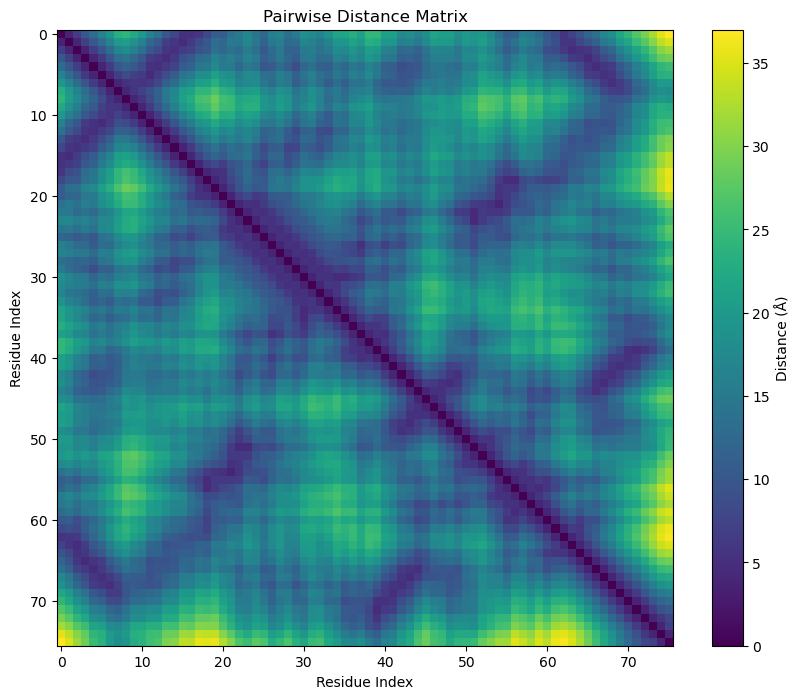

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import *

def get_coordinates(pdb_file):
    parser = PDBParser()
    structure = parser.get_structure('protein', pdb_file)
    coordinates = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    if atom.get_name() == 'CA':  # Only consider alpha carbons
                        coordinates.append(atom.get_coord())
    
    return np.array(coordinates)

def calculate_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])
    
    return distance_matrix

# Get coordinates from PDB file
coordinates = get_coordinates("1ubi.pdb")

# Calculate distance matrix
distance_matrix = calculate_distance_matrix(coordinates)

# Plot the distance matrix
plt.figure(figsize=(10, 8))
plt.imshow(distance_matrix, cmap='viridis')
plt.colorbar(label='Distance (Å)')
plt.title('Pairwise Distance Matrix')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()
